# **PyTorch Computer Vision**

## **Computer vision libaries in PyTorch**💧

- 👉 `torchvision` - base domain library for PyTorch computer vision                
- 👉 `torchvision.datasets`  - This submodule contains standard datasets such as `ImageNet`, `FashionMNIST`, `CIFAR`, and `COCO` etc. , and these datasets can be used for training custom models or evaluating existing ones.
- 👉 `torchvision.models` -  Here, you’ll find pre-defined architectures like `ResNet`, `VGG`, and `DenseNet`. These models can be fine-tuned or used as feature extractors for various computer vision tasks.
- 👉 `torchvision.transforms` - This submodule provides data augmentation techniques (e.g., `cropping`, `resizing`, `color adjustments`) to enhance model robustness during training. So this is the functions for manipulating your vision data (images) to be suitable for use with an ML model
- 👉 `torch.utils.data.Dataset` - A base class for creating custom datasets. You can subclass it to load your own data and prepare it for training.
- 👉 `torch.utils.data.DataLoader` - This class helps manage `data loading`, `batching`, and `shuffling` during training. It’s essential for efficient training with large datasets.

## **1. Getting a dataset**

In [30]:
# Import torch
import torch
from torch import nn

# Import torchvision
import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor

# Import matplotlib for visualization
import matplotlib.pyplot as plt

#check versions
print(torch.__version__)
print(torchvision.__version__)

2.2.1+cu121
0.17.1+cu121


In [31]:
# Getting the dataset
# Setup training data
from torchvision import datasets
train_data = datasets.FashionMNIST(
    root="data", # where to download data to?
    train=True, # do we want the training dataset?
    download=True, # do we want to download yes/no?
    transform=torchvision.transforms.ToTensor(), # how do we want to transform the data?
    target_transform=None # how do we want to transform the labels/targets?
)

# Setup test data
test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor(),
    target_transform=None
)

In [32]:
train_data, test_data

(Dataset FashionMNIST
     Number of datapoints: 60000
     Root location: data
     Split: Train
     StandardTransform
 Transform: ToTensor(),
 Dataset FashionMNIST
     Number of datapoints: 10000
     Root location: data
     Split: Test
     StandardTransform
 Transform: ToTensor())

In [33]:
len(train_data), len(test_data)

(60000, 10000)

In [34]:
image, label = train_data[0]

print(f"Image: {image}")
print(f"label: {label}")

Image: tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
          0.2863, 0.0000, 0.0000, 0.0039, 0.0157, 

In [35]:
class_names = train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [36]:
class_to_idx = train_data.class_to_idx
class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [37]:
train_data.targets

tensor([9, 0, 0,  ..., 3, 0, 5])

In [38]:
# Check the shape of our image
print(f"Image shape: {image.shape} -> [color_channels, height, width]")
print(f"Image Squeeze: {image.squeeze().shape} -> [height, width]")
print(f"Image label: {class_names[label]}")

Image shape: torch.Size([1, 28, 28]) -> [color_channels, height, width]
Image Squeeze: torch.Size([28, 28]) -> [height, width]
Image label: Ankle boot


Image shape: torch.Size([1, 28, 28])


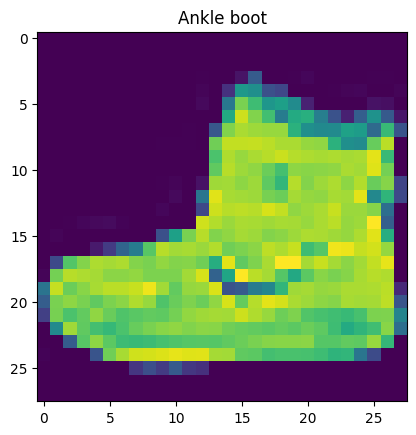

In [39]:
# Visualizing the data
import matplotlib.pyplot as plt

image, label = train_data[0]
print(f"Image shape: {image.shape}")
plt.imshow(image.squeeze())
plt.title(class_names[label])
plt.show()

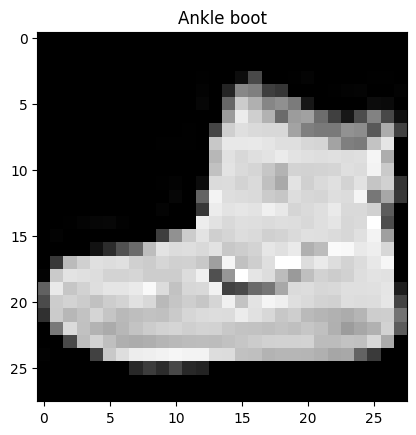

In [40]:
plt.imshow(image.squeeze(), cmap="gray")
plt.title(class_names[label])
plt.show()

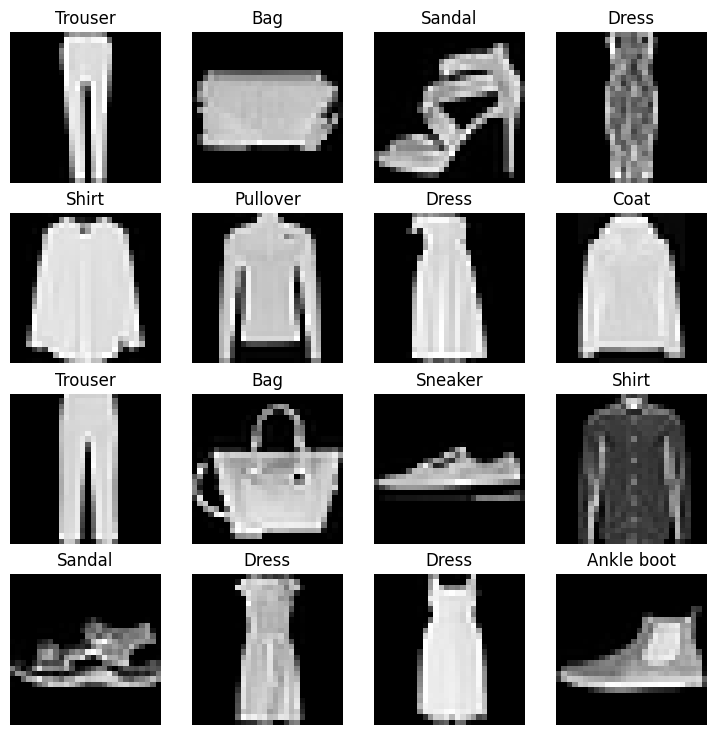

In [41]:
# plot more images
# torch.manual_seed(42)

fig = plt.figure(figsize=(9, 9))
rows, cols = 4, 4

for i in range(1, (rows*cols +1)):
    random_idx = torch.randint(0, len(train_data), size=[1]).item()
    img, label = train_data[random_idx]
    fig.add_subplot(rows, cols, i)
    plt.imshow(img.squeeze(), cmap="gray")
    plt.title(class_names[label])
    plt.axis(False)

## **2. Prepare DataLoader**

```pyton
train_data, test_data
--------------------------------
(Dataset FashionMNIST
     Number of datapoints: 60000
     Root location: data
     Split: Train
     StandardTransform
 Transform: ToTensor(),
 Dataset FashionMNIST
     Number of datapoints: 10000
     Root location: data
     Split: Test
     StandardTransform
 Transform: ToTensor())
--------------------------------
```

$\Rightarrow$ Right now, our data is in the form of **PyTorch** Datasets.



**PyTorch** Datasets hold our raw data, which is essential for training neural networks.

**DataLoader** is a powerful utility in PyTorch that converts datasets into python iterable `mini-batches`, facilitating:

- **Memory Management**: It is more computationally efficient, as in, your computing hardware may not be able to look (store in memory) at 60000 images in one hit. So we break it down to 32 images at a time (batch size of 32).


- **Gradient Optimization**: Frequent gradient updates per epoch can lead to faster convergence and improved learning.

Additional Advantages:

- **Randomization**: DataLoader shuffles the data, which is crucial for reducing model overfitting and improving generalization.

- **Parallel Processing**: It leverages multi-processing to prepare batches in the background, thus speeding up the training process.

- **Custom Batching**: You can define custom batch collation functions for complex data types or preprocessing.

In [42]:
from torch.utils.data import DataLoader

# setup the batch size hyperparameter
BATCH_SIZE = 32

# Turn the dataset into iterables (batches)
train_dataloader = DataLoader(dataset=train_data,
                              batch_size=BATCH_SIZE,
                              shuffle=True)

test_dataloader = DataLoader(dataset=test_data,
                             batch_size=BATCH_SIZE,
                             shuffle=False)

print(f"DataLoader: {train_dataloader, test_dataloader}")
print(f"Length of train_dataloader: {len(train_dataloader)} batch of {BATCH_SIZE}.")
print(f"Length of test_dataloader: {len(test_dataloader)} batch of {BATCH_SIZE}.")

# What's inside the dataloader
train_features_batch, train_label_batch = next(iter(train_dataloader))
print(f"train features batch shape: {train_features_batch.shape}")
print(f"test label batch shape: {train_label_batch.shape}")

DataLoader: (<torch.utils.data.dataloader.DataLoader object at 0x78c52c8bcdf0>, <torch.utils.data.dataloader.DataLoader object at 0x78c52c8bc520>)
Length of train_dataloader: 1875 batch of 32.
Length of test_dataloader: 313 batch of 32.
train features batch shape: torch.Size([32, 1, 28, 28])
test label batch shape: torch.Size([32])


image shape: torch.Size([1, 28, 28])
label shape: torch.Size([])
image label: 2


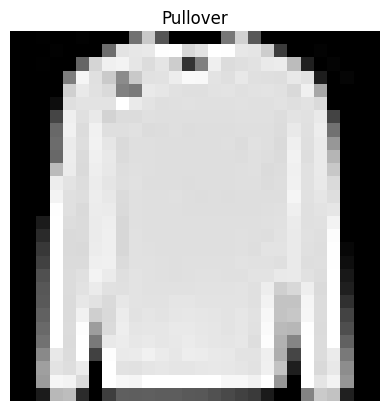

In [43]:
# visualizing the batch data
random_idx = torch.randint(0, len(train_features_batch), size=[1]).item()
img, label = train_features_batch[random_idx], train_label_batch[random_idx]
plt.imshow(img.squeeze(), cmap="gray")
plt.title(class_names[label])
plt.axis(False);

print(f"image shape: {img.shape}")
print(f"label shape: {label.shape}")
print(f"image label: {label}")

## **MODEL**

>**NOTE:** When starting to build a series of machine learning modelling experiments, it's best practice to start with a **baseline model**. A baseline model is a simple model you will try and improve upon with subsequent `models/experiments`.

In [44]:
# Create the Flatten layer
flatten_model = nn.Flatten()

# Get a single sample
x = train_features_batch[0]

# Flatten the sample
output = flatten_model(x)

# Print out what happened
print(f"Shape before flattening: {x.shape} -> [color_channels, height, width]")
print(f"Shape after flattening: {output.shape} -> [color_channels, height*width]")

Shape before flattening: torch.Size([1, 28, 28]) -> [color_channels, height, width]
Shape after flattening: torch.Size([1, 784]) -> [color_channels, height*width]


In [45]:
len(output.squeeze())

784

In [46]:

from torch import nn
class FashionMNISTModelV0(nn.Module):
    def __init__(self,
                 input_shape: int,
                 hidden_units: int,
                 output_shape: int):
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=input_shape, out_features=hidden_units),
            nn.Linear(in_features=hidden_units, out_features=output_shape)
            )

    def forward(self, x):
        return self.layer_stack(x)

torch.manual_seed(42)

# Setup model with input parameters
model_0 = FashionMNISTModelV0(
    input_shape=28*28, # Output from the flatten layer
    hidden_units=10,   # Number of hidden layers
    output_shape=len(class_names) # one for every class
).to("cpu")

model_0

FashionMNISTModelV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [47]:
# checking the model output using the dummy varible
dummy_x = torch.rand(1, 1, 28, 28) # batch, color_channel, height, height
model_0(dummy_x)                   # it  output 10 logits per image

tensor([[-0.0315,  0.3171,  0.0531, -0.2525,  0.5959,  0.2112,  0.3233,  0.2694,
         -0.1004,  0.0157]], grad_fn=<AddmmBackward0>)

In [48]:
model_0.state_dict()

OrderedDict([('layer_stack.1.weight',
              tensor([[ 0.0273,  0.0296, -0.0084,  ..., -0.0142,  0.0093,  0.0135],
                      [-0.0188, -0.0354,  0.0187,  ..., -0.0106, -0.0001,  0.0115],
                      [-0.0008,  0.0017,  0.0045,  ..., -0.0127, -0.0188,  0.0059],
                      ...,
                      [-0.0116,  0.0273, -0.0344,  ...,  0.0176,  0.0283, -0.0011],
                      [-0.0230,  0.0257,  0.0291,  ..., -0.0187, -0.0087,  0.0001],
                      [ 0.0176, -0.0147,  0.0053,  ..., -0.0336, -0.0221,  0.0205]])),
             ('layer_stack.1.bias',
              tensor([-0.0093,  0.0283, -0.0033,  0.0255,  0.0017,  0.0037, -0.0302, -0.0123,
                       0.0018,  0.0163])),
             ('layer_stack.2.weight',
              tensor([[ 0.0614, -0.0687,  0.0021,  0.2718,  0.2109,  0.1079, -0.2279, -0.1063,
                        0.2019,  0.2847],
                      [-0.1495,  0.1344, -0.0740,  0.2006, -0.0475, -0.2514, -0.